# Likelihood Analysis

Here I will cover how I go about constraining the optimal parameters for my grid of Milky Way models using likelihood analysis. Essentially for a given set of observations $x_{\mathrm{obs}, i}$ with associated error $\sigma_{i}$, the likelihood of the simulated observation $x_{\mathrm{model}, i}$ is,

$$
\mathcal{L} = \prod_i f_i = \prod_{i} \frac{1}{\sqrt{2 \pi \sigma_i^2}} \mathrm{exp} \left( {-\frac{(x_{\mathrm{obs}, i}-x_{\mathrm{model}, i})^2}{2\sigma_i^2}} \right).
$$

~~Since I consider a finite parameter space, say $x_{\mathrm{model}, i} = x(\alpha, \beta)$, I would normalise each $f_i$ by a factor $\zeta = \int\int \mathcal{f}(\alpha, \beta) \mathrm{d}\alpha\mathrm{d}\beta$~~. 

> *There is no need to normalise, since I do not calculate a probability. Rather I should remove the initial normalising factor from $f_i$ to calculate the likelihood. This has the advantage that $\mathcal{L}$ is dimensionless, and the normalisation factor for each observation is simply multiplied, anyways. Its removal will reduce some of the asymptotic behaviour due to arbitrarily-small error.*

To avoid dealing with very small numbers, I use the log-likelihood in my analysis:

$$
\mathrm{log_{10}} (\mathcal{L}) = \sum_i \mathrm{log_{10}} (f_i).
$$

The observations I have to constrain my model grid basically comes in two forms: spectroscopic $(l, b, v)$ datacubes and 2D (integrated) maps. Both are treated similarily such that I directly compare the elements of each dataset. This means the observation set in each likelihood calculation can have more than 1000 elements.

To account for the symetric nature of my models in the error, I also use a *configuration* error defined as,

\begin{align}
    \sigma_\mathrm{conf, 2D} &: I(|l|, |b|) = \mathrm{const.} \\
    \sigma_\mathrm{conf, 3D} &: I(v, l, |b|) = I(-v, -l, |b|). \\
\end{align}

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from kosmatau3d import models
from kosmatau3d.comparison.Observation import *

In [3]:
model = models.SyntheticModel(base_dir='/mnt/hpc_backup/yanitski/projects/pdr/KT3_history/MilkyWay/')
model.load_model(directory='r400_convergence/')

/tmp/ipykernel_387092/3469298855.py:7: RuntimeWarning: divide by zero encountered in log10
  cm = plt.imshow(np.log10(intensity[:, ::-1]), extent=[lon.min(), lon.max(), vel.min(), vel.max()], cmap='inferno', vmin=-2, vmax=1)


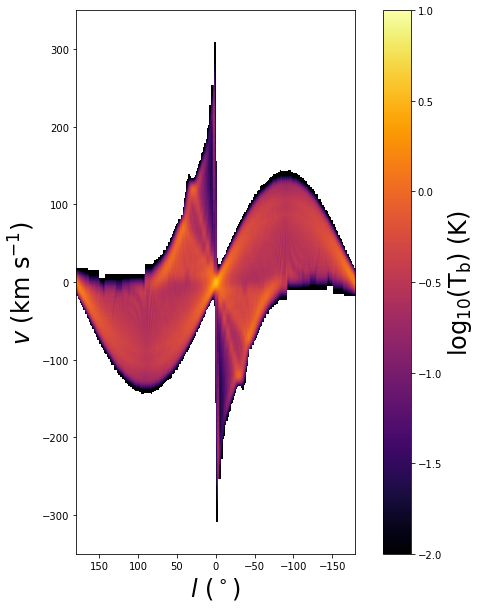

In [29]:
intensity = model.get_species_intensity(transition='CO 1', include_dust=False)[:, 4, :]
lon = model.map_lon
vel = model.map_vel
fontsize = 24

plt.figure(figsize=(10, 10))
cm = plt.imshow(np.log10(intensity[:, ::-1]), extent=[lon.min(), lon.max(), vel.min(), vel.max()], cmap='inferno', vmin=-2, vmax=1)
cb = plt.colorbar(cm)
plt.gca().invert_xaxis()
plt.xlabel(r'$l$ ($^\circ$)', fontsize=fontsize)
plt.ylabel(r'$v$ (km s$^{-1}$)', fontsize=fontsize)
cb.ax.set_ylabel(r'$\mathrm{log_{10}} \left( \mathrm{T}_\mathrm{b} \right)$ (K)', fontsize=fontsize) ;